In [1]:
import pandas as pd

In [2]:
# import csv to df
salary_df1 = pd.read_csv("../imported_data/salary_data1.csv", header=3)
salary_df1.head()


,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,1/5/2017 5:10:20,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,1/5/2017 5:26:23,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,1/5/2017 5:32:57,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,1/5/2017 5:33:03,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,1/5/2017 5:34:34,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [3]:
# take only the columns we need
salary_df1 = salary_df1[["Survey Year", "SalaryUSD", "Country", "PrimaryDatabase", "YearsWithThisDatabase", "EmploymentStatus", "JobTitle", "ManageStaff", "YearsWithThisTypeOfJob", "OtherPeopleOnYourTeam", "Education", "EducationIsComputerRelated", "Certifications", "HoursWorkedPerWeek", "TelecommuteDaysPerWeek", "EmploymentSector"]]
salary_df1


,Survey Year,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,2017,200000,United States,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,2017,61515,United Kingdom,Microsoft SQL Server,15,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
2,2017,95000,Germany,Microsoft SQL Server,5,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business
3,2017,56000,United Kingdom,Microsoft SQL Server,6,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,2017,35000,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,2019,32000,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,2019,32000,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,2019,40000,Portugal,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,2019,130000,United States,Microsoft SQL Server,20,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [4]:
# check the datatypes to see what needs to be changed
salary_df1.dtypes

Survey Year                    int64
SalaryUSD                     object
Country                       object
PrimaryDatabase               object
YearsWithThisDatabase          int64
EmploymentStatus              object
JobTitle                      object
ManageStaff                   object
YearsWithThisTypeOfJob         int64
OtherPeopleOnYourTeam         object
Education                     object
EducationIsComputerRelated    object
Certifications                object
HoursWorkedPerWeek             int64
TelecommuteDaysPerWeek        object
EmploymentSector              object
dtype: object

In [5]:
# take out non-integer characters in the salary column
salary_df1["SalaryUSD"] = salary_df1["SalaryUSD"].str.replace(",", "")
salary_df1["SalaryUSD"] = salary_df1["SalaryUSD"].str.replace(" ", "")
salary_df1["SalaryUSD"] = salary_df1["SalaryUSD"].str.replace("$", "")
# change the salary type to float
salary_df1["SalaryUSD"] = salary_df1["SalaryUSD"].astype(float)
# check to make sure the salary column is correct data type
salary_df1.dtypes


Survey Year                     int64
SalaryUSD                     float64
Country                        object
PrimaryDatabase                object
YearsWithThisDatabase           int64
EmploymentStatus               object
JobTitle                       object
ManageStaff                    object
YearsWithThisTypeOfJob          int64
OtherPeopleOnYourTeam          object
Education                      object
EducationIsComputerRelated     object
Certifications                 object
HoursWorkedPerWeek              int64
TelecommuteDaysPerWeek         object
EmploymentSector               object
dtype: object

In [6]:
# only take salaries that are greater than 1000 to get rid of low outliers
salary_df1 = salary_df1.loc[salary_df1["SalaryUSD"] > 1000]
salary_df1


,Survey Year,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,2017,200000.0,United States,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,2017,61515.0,United Kingdom,Microsoft SQL Server,15,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
2,2017,95000.0,Germany,Microsoft SQL Server,5,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business
3,2017,56000.0,United Kingdom,Microsoft SQL Server,6,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,2017,35000.0,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,2019,32000.0,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,2019,32000.0,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,2019,40000.0,Portugal,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,2019,130000.0,United States,Microsoft SQL Server,20,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [7]:
# # take out incorrect/nonsensical data from "YearsWithThisDatabase"
salary_df1 = salary_df1.loc[(salary_df1["YearsWithThisDatabase"] < 2050)]
salary_df1 = salary_df1.loc[(salary_df1["YearsWithThisDatabase"] != 1050)]
salary_df1


,Survey Year,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,2017,200000.0,United States,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,2017,61515.0,United Kingdom,Microsoft SQL Server,15,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
2,2017,95000.0,Germany,Microsoft SQL Server,5,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business
3,2017,56000.0,United Kingdom,Microsoft SQL Server,6,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,2017,35000.0,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,2019,32000.0,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,2019,32000.0,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,2019,40000.0,Portugal,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,2019,130000.0,United States,Microsoft SQL Server,20,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [8]:
# some people entered the year they started instead of amount of years worked in the column "YearsWithThisDatabase"
# this loop takes the year they started and subtracts it from the year they took the survey to get the total yeras worked there
for index, row in salary_df1.iterrows():
    if row[4] > 1000:
        number = row[0] - row[4]
        # print out the number to make sure it worked
        print(number)
        salary_df1.at[index, "YearsWithThisDatabase"] = number

# sort in descending order to make sure numbers in the 2000s don't appear in the "YearsWithThisDatabase" column
salary_df1.sort_values("YearsWithThisDatabase", ascending = False)


14
10
15
8
19


,Survey Year,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
1694,2017,51000.0,United States,Microsoft SQL Server,38,Full time employee,DBA,No,4,3,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
4843,2018,129000.0,United States,Microsoft SQL Server,32,Full time employee,"Developer: App code (C#, JS, etc)",Yes,9,4,Bachelors (4 years),No,"No, I never have",50,1,Private business
688,2017,134000.0,United States,Microsoft SQL Server,32,Full time employee,Architect,Yes,2,None,Associates (2 years),Yes,"No, I never have",65,"None, or less than 1 day per week",Private business
6823,2019,500000.0,Switzerland,Microsoft SQL Server,32,"Independent consultant, contractor, freelancer...",DBA (General - splits time evenly between writ...,Yes,32,More than 5,Masters,Yes,"Yes, and they're currently valid",70,3,Private business
650,2017,76650.0,Netherlands,DB2,31,Independent or freelancer or company owner,DBA,Yes,37,None,Bachelors (4 years),Yes,"Yes, but they expired",36,4,Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,2018,48000.0,United States,Microsoft SQL Server,0,Full time employee,DBA (Production Focus - build & troubleshoot s...,No,0,None,Bachelors (4 years),No,"No, I never have",40,"None, or less than 1 day per week",Private business
1216,2017,37166.0,United Kingdom,Microsoft SQL Server,0,Full time employee,DBA,No,0,1,Associates (2 years),Yes,"No, I never have",37,"None, or less than 1 day per week",Private business
3962,2018,6516.5,South Africa,Microsoft SQL Server,0,Full time employee,"DBA (Development Focus - tunes queries, indexe...",No,0,3,None (no degree completed),NaN,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
2479,2017,88000.0,United States,PostgreSQL,0,Full time employee,Analyst,No,0,More than 5,Bachelors (4 years),No,"No, I never have",45,"None, or less than 1 day per week",Private business


In [9]:
# we only needed the "survey year" column to complete the previous step, so we are removing it now
del salary_df1["Survey Year"]
salary_df1


,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,200000.0,United States,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,61515.0,United Kingdom,Microsoft SQL Server,15,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
2,95000.0,Germany,Microsoft SQL Server,5,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business
3,56000.0,United Kingdom,Microsoft SQL Server,6,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,35000.0,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,32000.0,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,32000.0,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,40000.0,Portugal,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,130000.0,United States,Microsoft SQL Server,20,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [10]:
# remove rows where the job title only has 1-2 entries for that title
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Analytics consultant") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Consultant") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Database Specialist") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Sales") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Sr Consultant ") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Systems Administrator") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Technician ") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Technician ") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Data Scientist") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Other") ].index, inplace=True)

salary_df1.drop(salary_df1[(salary_df1['EmploymentStatus'] == "Part time") ].index, inplace=True)

salary_df1.drop(salary_df1[(salary_df1['EmploymentSector'] == "Student") ].index, inplace=True)

salary_df1.drop(salary_df1[(salary_df1['HoursWorkedPerWeek'] > 100) ].index, inplace=True)
# salary_df1.drop(salary_df1[(salary_df1['HoursWorkedPerWeek'] < 30) ].index, inplace=True)


salary_df1


,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,200000.0,United States,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,61515.0,United Kingdom,Microsoft SQL Server,15,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
3,56000.0,United Kingdom,Microsoft SQL Server,6,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,35000.0,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
5,215000.0,United Kingdom,Microsoft SQL Server,15,Independent or freelancer or company owner,DBA,No,15,None,Bachelors (4 years),No,"Yes, but they expired",35,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,32000.0,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,32000.0,Hungary,Microsoft SQL Server,3,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,40000.0,Portugal,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,130000.0,United States,Microsoft SQL Server,20,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [11]:
# group job titles into more organized categories
salary_df1.loc[salary_df1["JobTitle"] == "DBA (Development Focus - tunes queries, indexes, does deployments)", "JobTitle"] = "DBA"
salary_df1.loc[salary_df1["JobTitle"] == "DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)", "JobTitle"] = "DBA"
salary_df1.loc[salary_df1["JobTitle"] == "DBA (Production Focus - build & troubleshoot servers, HA/DR)", "JobTitle"] = "DBA"

salary_df1.loc[salary_df1["JobTitle"] == "DevOps, Sr Software Engineer DBA", "JobTitle"] = "Engineer"
salary_df1.loc[salary_df1["JobTitle"] == "Principal database engineer", "JobTitle"] = "Engineer"

salary_df1.loc[salary_df1["JobTitle"] == "DBA / BI Developer", "JobTitle"] = "Developer"
salary_df1.loc[salary_df1["JobTitle"] == "Developer: App code (C#, JS, etc)", "JobTitle"] = "Developer"
salary_df1.loc[salary_df1["JobTitle"] == "Developer: T-SQL", "JobTitle"] = "Developer"
salary_df1.loc[salary_df1["JobTitle"] == "Developer: Business Intelligence (SSRS, PowerBI, etc)", "JobTitle"] = "Developer"

salary_df1.loc[salary_df1["EmploymentStatus"] == "Full time employee of a consulting/contracting company", "EmploymentStatus"] = "Full time employee"
salary_df1.loc[salary_df1["EmploymentStatus"] == "Independent consultant, contractor, freelancer,  or company owner", "EmploymentStatus"] = "Independent Consultant/Freelancer"
salary_df1.loc[salary_df1["EmploymentStatus"] == "Independent or freelancer or company owner", "EmploymentStatus"] = "Independent Consultant/Freelancer"

salary_df1.loc[salary_df1["EmploymentSector"] == "Federal government", "EmploymentSector"] = "Government"
salary_df1.loc[salary_df1["EmploymentSector"] == "Local government", "EmploymentSector"] = "Government"
salary_df1.loc[salary_df1["EmploymentSector"] == "State/province government", "EmploymentSector"] = "Government"

salary_df1["EmploymentStatus"].value_counts()


Full time employee                   6435
Independent Consultant/Freelancer     261
Name: EmploymentStatus, dtype: int64

In [12]:
# import the country to regions csv
country_to_region_df = pd.read_csv("../imported_data/country_to_region.csv")
country_to_region_df


,Country,Region
0,Canada,North America
1,Russia,Eastern Europe
2,Indonesia,Asia
3,Argentina,Latin America
4,Colombia,Latin America
...,...,...
80,Taiwan,Asia
81,Thailand,Asia
82,Uruguay,South America
83,Venezuela,South America


In [13]:
# merge salary df with county to region df so each row specifies the region as well as country
merged_df = pd.merge(salary_df1, country_to_region_df, on="Country", how="outer")
merged_df


,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region
0,200000.0,United States,Microsoft SQL Server,10.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America
1,137500.0,United States,Microsoft SQL Server,16.0,Full time employee,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America
2,85000.0,United States,Microsoft SQL Server,8.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America
3,96000.0,United States,Microsoft SQL Server,5.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America
4,66000.0,United States,Microsoft SQL Server,10.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,35100.0,Guatemala,Microsoft SQL Server,1.0,Full time employee,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America
6695,51000.0,Taiwan,Microsoft SQL Server,13.0,Full time employee,DBA,No,10.0,More than 5,Masters,Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Asia
6696,NaN,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
6697,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Europe


In [14]:
del merged_df["Country"]

In [15]:
merged_df = merged_df[:-3]
merged_df


,SalaryUSD,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region
0,200000.0,Microsoft SQL Server,10.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America
1,137500.0,Microsoft SQL Server,16.0,Full time employee,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America
2,85000.0,Microsoft SQL Server,8.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America
3,96000.0,Microsoft SQL Server,5.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America
4,66000.0,Microsoft SQL Server,10.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,7500.0,Microsoft SQL Server,4.0,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa
6692,22350.0,Microsoft SQL Server,11.0,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America
6693,17333.0,Microsoft SQL Server,7.0,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America
6694,35100.0,Microsoft SQL Server,1.0,Full time employee,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America


In [16]:
import scipy.stats as sts
import numpy as np

z_score = sts.zscore(merged_df["SalaryUSD"].values)
abs_zscores = np.abs(z_score)
outlier_indexes = np.where(abs_zscores > 3)[0]
outlier_indexes


array([  61,   94,  186,  189,  478,  738, 1118, 1341, 1477, 1588, 1680,
       1932, 2004, 2173, 2328, 2342, 2397, 2666, 2792, 2877, 2932, 2976,
       3066, 3138, 3239, 3249, 3265, 3466, 3551, 3832, 3847, 3918, 4338,
       4767, 4913, 5037, 5151, 5200, 5850, 5854, 5972, 6213, 6217, 6240,
       6500, 6634], dtype=int64)

In [17]:
for outlier in outlier_indexes:
    index_of_outlier = merged_df[((merged_df.index == outlier))]
    merged_df.drop(index_of_outlier.index, inplace=True)
    
merged_df


C:\Users\vijay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SalaryUSD,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region
0,200000.0,Microsoft SQL Server,10.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America
1,137500.0,Microsoft SQL Server,16.0,Full time employee,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America
2,85000.0,Microsoft SQL Server,8.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America
3,96000.0,Microsoft SQL Server,5.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America
4,66000.0,Microsoft SQL Server,10.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,7500.0,Microsoft SQL Server,4.0,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa
6692,22350.0,Microsoft SQL Server,11.0,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America
6693,17333.0,Microsoft SQL Server,7.0,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America
6694,35100.0,Microsoft SQL Server,1.0,Full time employee,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America


In [18]:
# years_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
# years_bin_names = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40"]
# merged_df["YearsWithThisTypeOfJob"] = pd.cut(merged_df["YearsWithThisTypeOfJob"], years_bins, labels=years_bin_names, include_lowest=True)
# merged_df


In [19]:
# hours_bins = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
# hours_bin_names = ["30-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "81-85", "86-90", "91-95", "96-100"]
# merged_df["HoursWorkedPerWeek"] = pd.cut(merged_df["HoursWorkedPerWeek"], hours_bins, labels=hours_bin_names, include_lowest=True)
# merged_df


In [20]:
salary_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000]
salary_bin_names = [5000, 15000, 25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 105000, 115000, 125000, 135000, 145000, 155000, 165000, 175000, 185000, 195000, 205000, 215000, 225000, 235000, 245000, 255000]
merged_df["AverageSalaryUSDBins"] = pd.cut(merged_df["SalaryUSD"], salary_bins, labels=salary_bin_names, include_lowest=True)
merged_df


C:\Users\vijay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SalaryUSD,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region,AverageSalaryUSDBins
0,200000.0,Microsoft SQL Server,10.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America,195000
1,137500.0,Microsoft SQL Server,16.0,Full time employee,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America,135000
2,85000.0,Microsoft SQL Server,8.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America,85000
3,96000.0,Microsoft SQL Server,5.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America,95000
4,66000.0,Microsoft SQL Server,10.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,7500.0,Microsoft SQL Server,4.0,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa,5000
6692,22350.0,Microsoft SQL Server,11.0,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America,25000
6693,17333.0,Microsoft SQL Server,7.0,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America,15000
6694,35100.0,Microsoft SQL Server,1.0,Full time employee,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America,35000


In [21]:
# del merged_df["SalaryUSD"]
# merged_df


In [22]:
# merged_df = merged_df.loc[merged_df["Region"] == "North America"]
# merged_df


In [23]:
# rename all column headers to be lowercase to fit postgres format
merged_df.columns = map(str.lower, merged_df.columns)
merged_df


,salaryusd,primarydatabase,yearswiththisdatabase,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region,averagesalaryusdbins
0,200000.0,Microsoft SQL Server,10.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America,195000
1,137500.0,Microsoft SQL Server,16.0,Full time employee,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America,135000
2,85000.0,Microsoft SQL Server,8.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America,85000
3,96000.0,Microsoft SQL Server,5.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America,95000
4,66000.0,Microsoft SQL Server,10.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,7500.0,Microsoft SQL Server,4.0,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa,5000
6692,22350.0,Microsoft SQL Server,11.0,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America,25000
6693,17333.0,Microsoft SQL Server,7.0,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America,15000
6694,35100.0,Microsoft SQL Server,1.0,Full time employee,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America,35000


In [24]:
# makes a column called id to be used as the primary key
merged_df = merged_df.reset_index()
merged_df = merged_df.rename(columns={"index":"id"})
merged_df


,id,salaryusd,primarydatabase,yearswiththisdatabase,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region,averagesalaryusdbins
0,0,200000.0,Microsoft SQL Server,10.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America,195000
1,1,137500.0,Microsoft SQL Server,16.0,Full time employee,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America,135000
2,2,85000.0,Microsoft SQL Server,8.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America,85000
3,3,96000.0,Microsoft SQL Server,5.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America,95000
4,4,66000.0,Microsoft SQL Server,10.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,6691,7500.0,Microsoft SQL Server,4.0,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa,5000
6646,6692,22350.0,Microsoft SQL Server,11.0,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America,25000
6647,6693,17333.0,Microsoft SQL Server,7.0,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America,15000
6648,6694,35100.0,Microsoft SQL Server,1.0,Full time employee,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America,35000


In [25]:
# get list of columns to make postgresql schema
merged_df.keys()


Index(['id', 'salaryusd', 'primarydatabase', 'yearswiththisdatabase',
       'employmentstatus', 'jobtitle', 'managestaff', 'yearswiththistypeofjob',
       'otherpeopleonyourteam', 'education', 'educationiscomputerrelated',
       'certifications', 'hoursworkedperweek', 'telecommutedaysperweek',
       'employmentsector', 'region', 'averagesalaryusdbins'],
      dtype='object')

In [26]:
# get data types of columns to make postgresql schema
merged_df.dtypes


id                               int64
salaryusd                      float64
primarydatabase                 object
yearswiththisdatabase          float64
employmentstatus                object
jobtitle                        object
managestaff                     object
yearswiththistypeofjob         float64
otherpeopleonyourteam           object
education                       object
educationiscomputerrelated      object
certifications                  object
hoursworkedperweek             float64
telecommutedaysperweek          object
employmentsector                object
region                          object
averagesalaryusdbins          category
dtype: object

In [27]:
# load the cleaned df to a csv
merged_df.to_csv("../exported_data/salary_data1.csv")


In [35]:
# Configure settings for RDS
# from config import sandy_RDS_username
# from config import sandy_RDS_password
# from config import sandy_RDS_endpoint
from sqlalchemy import create_engine

rds_connection_string = "root:RamNivas08@predictyoursalary.cruwlreaual5.us-east-2.rds.amazonaws.com:5432/predictyoursalary"
engine = create_engine(f'postgresql://{rds_connection_string}')


In [36]:
# check that connection worked
engine.table_names()


['salary_data1', 'salary_data2']

In [37]:
pd.read_sql_query('select * from salary_data1', con=engine)

,id,salaryusd,country,primarydatabase,yearswiththisdatabase,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,databaseservers,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region,averagesalaryusdbins


In [38]:
# adds dataframe to RDS
merged_df.to_sql(name='salary_data1', con=engine, if_exists='append', index=False)


In [41]:
# Check to confirm that data was loaded successfully
pd.read_sql_query('select * from salary_data1 limit 3', con=engine)


,id,salaryusd,country,primarydatabase,yearswiththisdatabase,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,databaseservers,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region,averagesalaryusdbins
0,0,200000,None,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,None,Masters,No,"Yes, and they're currently valid",45,1,Private business,North America,195000
1,1,137500,None,Microsoft SQL Server,16,Full time employee,DBA,No,6,4,None,None (no degree completed),None,"Yes, and they're currently valid",55,5 or more,Private business,North America,135000
2,2,85000,None,Microsoft SQL Server,8,Full time employee,DBA,No,2,None,None,Bachelors (4 years),Yes,"No, I never have",50,"None, or less than 1 day per week",Private business,North America,85000


Text(0.5, 1.015, 'Distribution of Salaries')

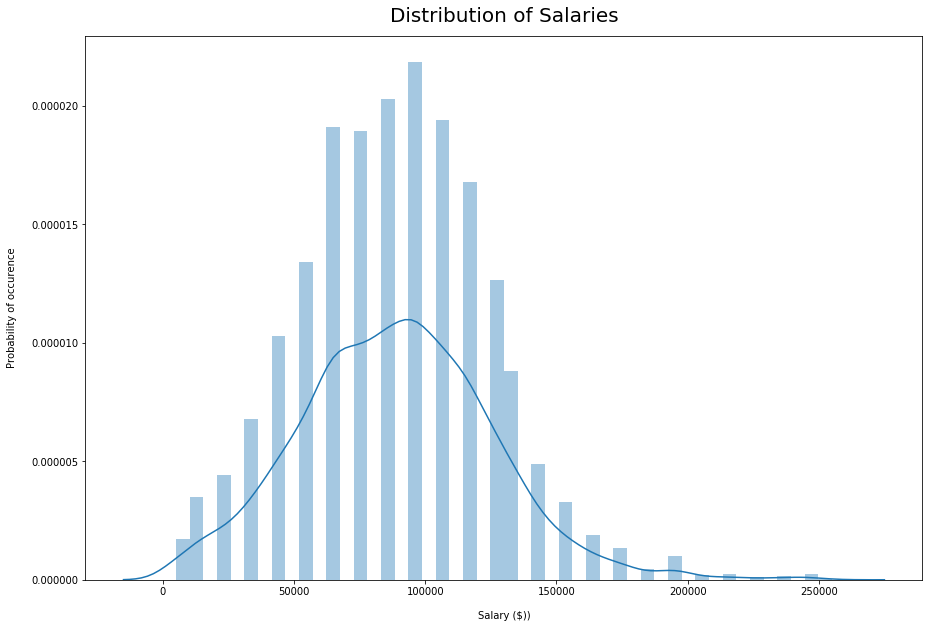

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of data
plt.figure(figsize=(15,10)) 
sns.distplot(merged_df["averagesalaryusdbins"])
plt.xlabel("Salary ($))", labelpad=14)
plt.ylabel("Probability of occurence", labelpad=14)
plt.title("Distribution of Salaries", y=1.015, fontsize=20)
